In [23]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import cross_validation
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


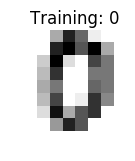

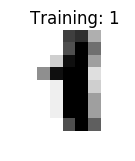

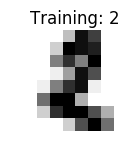

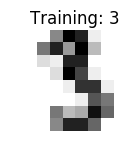

In [24]:
# load the mnist dataset
mnist_dataset = datasets.load_digits()
images_and_labels = list(zip(mnist_dataset.images, mnist_dataset.target))
for i, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()

# split into test and train and cv
X_train, X_test, y_train, y_test = model_selection.train_test_split(mnist_dataset.data, mnist_dataset.target, test_size=0.8)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


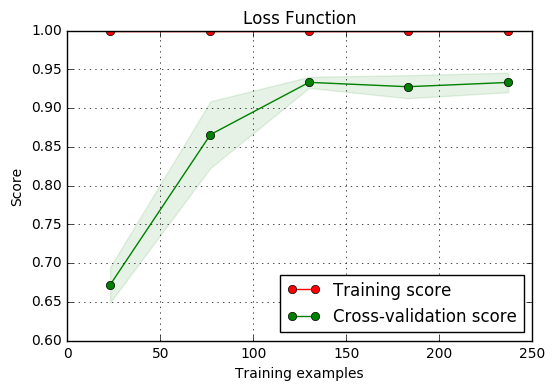

In [25]:
# fit a logistic regression model to the data 
model = LogisticRegression()
train_sizes, train_scores, test_scores = model_selection.learning_curve(model, X_train, y_train, train_sizes=np.linspace(.1,1.0,5))
model.fit(X_train, y_train)
print(model)
plt.figure()
plt.title("Loss Function")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="lower right")
plt.show()

In [26]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# print (expected) #Actual Digits 
# print (predicted) #Model prediction 

print ("Accuracy: ", metrics.accuracy_score(y_test, predicted)*100, "%")

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print (metrics.confusion_matrix(y_test, predicted))

#cross-validation
scores = cross_validation.cross_val_score(LogisticRegression(), mnist_dataset.data, mnist_dataset.target, scoring='accuracy', cv=10)

print (scores[1]) # Do something with the cross validation scores pls!

#TODO - Percision, Recall , F1, F2 score

Accuracy:  93.8108484006 %
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       142
          1       0.86      0.94      0.90       148
          2       0.99      0.98      0.99       138
          3       0.92      0.96      0.94       143
          4       0.99      0.98      0.98       148
          5       0.97      0.94      0.95       153
          6       0.94      0.96      0.95       138
          7       0.96      0.97      0.97       137
          8       0.86      0.78      0.82       141
          9       0.91      0.90      0.90       150

avg / total       0.94      0.94      0.94      1438

[[138   0   0   0   0   0   1   0   3   0]
 [  0 139   0   3   1   0   0   0   4   1]
 [  0   0 135   2   0   0   0   0   1   0]
 [  0   0   0 137   0   2   0   1   2   1]
 [  0   1   0   0 145   0   0   1   0   1]
 [  1   1   1   1   0 144   1   1   0   3]
 [  0   2   0   0   0   1 133   0   2   0]
 [  0   0   0   0   0   0   0 133